# AGILE AUTONOMY

In [1]:
from bagpy import bagreader

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def normalize(x, y, z):
    a = (x ** 2 + y ** 2 + z ** 2) ** 0.5
    return a / a.abs().max()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
bag = bagreader('2022-05-18-17-39-14.bag')

[INFO]  Data folder 2022-05-18-17-39-14 already exists. Not creating.


In [5]:
bag.topic_table

,Topics,Types,Message Count,Frequency
0,/hummingbird/autopilot/control_command_input,quadrotor_msgs/ControlCommand,287,50.000000
1,/hummingbird/autopilot/feedback,quadrotor_msgs/AutopilotFeedback,419,45.454545
2,/hummingbird/autopilot/off,std_msgs/Empty,1,NaN
3,/hummingbird/control_command,quadrotor_msgs/ControlCommand,415,50.000000
4,/hummingbird/gazebo/command/motor_speed,mav_msgs/Actuators,8411,1000.000000
5,/hummingbird/ground_truth/odometry,nav_msgs/Odometry,8399,NaN
6,/hummingbird/odometry_sensor1/odometry,nav_msgs/Odometry,8402,NaN
7,/hummingbird/odometry_sensor1/pose,geometry_msgs/Pose,8404,1000.000000
8,/hummingbird/odometry_sensor1/pose_with_covari...,geometry_msgs/PoseWithCovarianceStamped,8404,1000.000000
9,/hummingbird/odometry_sensor1/position,geometry_msgs/PointStamped,8405,1000.000000


In [6]:
df = pd.read_csv(bag.message_by_topic('/hummingbird/autopilot/feedback'))
df2 = pd.read_csv(bag.message_by_topic('/hummingbird/autopilot/control_command_input'))
df3 = pd.read_csv(bag.message_by_topic('/hummingbird/ground_truth/odometry'))
df4 = pd.read_csv(bag.message_by_topic('/hummingbird/control_command'))

In [7]:
df3.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,123.986,123764,123,985000000,world,hummingbird/base_link,-19.999999,20.0,1.890416,-2.669675e-09,-1.112981e-10,-3.282930e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.739398e-10,-7.669510e-10,-1.716999e-07,2.330944e-08,-2.966860e-11,2.493918e-10,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,123.986,123765,123,986000000,world,hummingbird/base_link,-19.999999,20.0,1.890416,-2.657241e-09,-1.120558e-10,-3.282916e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.803538e-10,-7.159306e-10,-1.719006e-07,2.486821e-08,-1.515299e-09,2.734283e-10,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,123.987,123766,123,987000000,world,hummingbird/base_link,-19.999999,20.0,1.890416,-2.644485e-09,-1.130777e-10,-3.282901e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.872619e-10,-6.654211e-10,-1.721405e-07,2.551315e-08,-2.043779e-09,3.013733e-10,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,123.988,123767,123,988000000,world,hummingbird/base_link,-19.999999,20.0,1.890416,-2.631886e-09,-1.137550e-10,-3.282885e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.939303e-10,-6.166515e-10,-1.724184e-07,2.519782e-08,-1.354589e-09,3.316506e-10,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,123.989,123768,123,989000000,world,hummingbird/base_link,-19.999999,20.0,1.890416,-2.619816e-09,-1.135198e-10,-3.282867e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.997095e-10,-5.685100e-10,-1.727326e-07,2.413897e-08,4.703384e-10,3.617635e-10,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
df2.columns

Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'control_mode', 'armed',
       'expected_execution_time.secs', 'expected_execution_time.nsecs',
       'orientation.x', 'orientation.y', 'orientation.z', 'orientation.w',
       'bodyrates.x', 'bodyrates.y', 'bodyrates.z', 'angular_accelerations.x',
       'angular_accelerations.y', 'angular_accelerations.z',
       'collective_thrust'],
      dtype='object')

In [9]:
df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,autopilot_state,control_command_delay.secs,control_command_delay.nsecs,control_computation_time.secs,control_computation_time.nsecs,trajectory_execution_left_duration.secs,trajectory_execution_left_duration.nsecs,trajectories_left_in_queue,low_level_feedback.header.seq,low_level_feedback.header.stamp.secs,low_level_feedback.header.stamp.nsecs,low_level_feedback.header.frame_id,low_level_feedback.battery_voltage,low_level_feedback.battery_state,low_level_feedback.control_mode,low_level_feedback.motor_speeds,low_level_feedback.thrust_mapping_coeffs,reference_state.time_from_start.secs,reference_state.time_from_start.nsecs,reference_state.pose.position.x,reference_state.pose.position.y,reference_state.pose.position.z,reference_state.pose.orientation.x,reference_state.pose.orientation.y,reference_state.pose.orientation.z,reference_state.pose.orientation.w,reference_state.velocity.linear.x,reference_state.velocity.linear.y,reference_state.velocity.linear.z,reference_state.velocity.angular.x,reference_state.velocity.angular.y,reference_state.velocity.angular.z,reference_state.acceleration.linear.x,reference_state.acceleration.linear.y,reference_state.acceleration.linear.z,reference_state.acceleration.angular.x,reference_state.acceleration.angular.y,reference_state.acceleration.angular.z,reference_state.jerk.linear.x,reference_state.jerk.linear.y,reference_state.jerk.linear.z,reference_state.jerk.angular.x,reference_state.jerk.angular.y,reference_state.jerk.angular.z,reference_state.snap.linear.x,reference_state.snap.linear.y,reference_state.snap.linear.z,reference_state.snap.angular.x,reference_state.snap.angular.y,reference_state.snap.angular.z,reference_state.heading,reference_state.heading_rate,reference_state.heading_acceleration,state_estimate.header.seq,state_estimate.header.stamp.secs,state_estimate.header.stamp.nsecs,state_estimate.header.frame_id,state_estimate.child_frame_id,state_estimate.pose.pose.position.x,state_estimate.pose.pose.position.y,state_estimate.pose.pose.position.z,state_estimate.pose.pose.orientation.x,state_estimate.pose.pose.orientation.y,state_estimate.pose.pose.orientation.z,state_estimate.pose.pose.orientation.w,state_estimate.pose.covariance,state_estimate.twist.twist.linear.x,state_estimate.twist.twist.linear.y,state_estimate.twist.twist.linear.z,state_estimate.twist.twist.angular.x,state_estimate.twist.twist.angular.y,state_estimate.twist.twist.angular.z,state_estimate.twist.covariance
0,123.998,6180,123,998000000,NaN,2,0,50000000,0,0,0,0,0,0,0,0,NaN,0.0,0,0,(),(),0,0,-20.0,20.0,1.890692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.655315e-08,0.0,0.0,0,124,48000000,world,body,-19.999999,20.0,1.890421,-1.731866e-09,1.832481e-10,-3.287591e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8.004513e-10,2.004098e-09,0.000191,4.083989e-08,4.938922e-09,-3.541834e-09,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,124.019,6181,124,19000000,NaN,2,0,50000000,0,0,0,0,0,0,0,0,NaN,0.0,0,0,(),(),0,0,-20.0,20.0,1.890692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.655315e-08,0.0,0.0,0,124,69000000,world,body,-19.999999,20.0,1.890421,-1.451010e-09,2.782376e-10,-3.288624e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9.523236e-10,2.708308e-09,0.000191,4.038680e-08,-1.089658e-09,-3.789928e-09,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,124.039,6182,124,39000000,NaN,2,0,50000000,0,0,0,0,0,0,0,0,NaN,0.0,0,0,(),(),0,0,-20.0,20.0,1.890692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.655315e-08,0.0,0.0,0,124,89000000,world,body,-19.999999,20.0,1.890421,-1.302189e-09,1.885244e-10,-3.289189e-08,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.031989e-09,3.386886e-09,0.000191,3.823837e-08,-6.275370e-09

In [24]:
v.tolist()

[2.093199644391714e-05,
 4.112626315620304e-05,
 6.738990982616424e-05,
 9.945034988401238e-05,
 0.00013685267022418864,
 0.00017941103305039904,
 0.0002269529029222178,
 0.0002793169151578492,
 0.00033635112776722695,
 0.00039814470582229386,
 0.00046454871597170907,
 0.0005354185892190289,
 0.0006106138954514393,
 0.0006899981646748672,
 0.0007734387447948651,
 0.000861109548659405,
 0.0009528526769071148,
 0.0010485162715089674,
 0.001147954313447161,
 0.0012352299263449448,
 0.0013111650608369286,
 0.001376538279181491,
 0.0014320855273195143,
 0.001478501322545963,
 0.0015164402602182738,
 0.0015459682530276325,
 0.0015677089800144202,
 0.0015822519218671514,
 0.0015901540660328264,
 0.0015919418579347765,
 0.001588113366778145,
 0.0015791406471150297,
 0.0015654722902865527,
 0.0015477994220358833,
 0.0015265050870401857,
 0.0015020842326839512,
 0.001474882551430206,
 0.0014452399581895085,
 0.0014134944289985274,
 0.0013789650535323116,
 0.0013420819853116606,
 0.00130328776303

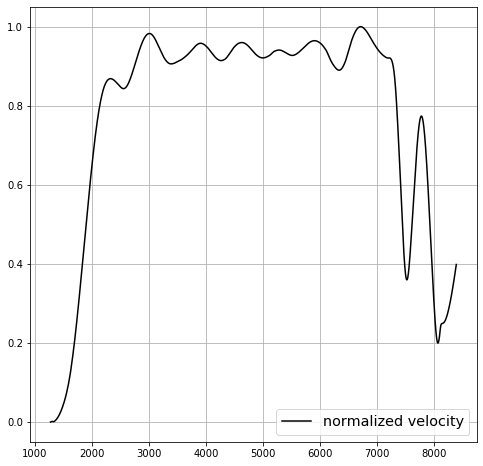

In [33]:
_df = df3

x = _df['twist.twist.linear.x']
y = _df['twist.twist.linear.y']
z = _df['twist.twist.linear.z']
_v = normalize(x, y, z)
v = _v[abs(_v) > 10e-6]


import json
with open('agile_velocity.json', 'w') as fp:
    json.dump(v.dropna().tolist(), fp)

# _t = _df['Time']
# t = _t[abs(_v) > 10e-6]
# t = (t - t.min()) * 2.5
plt.figure(figsize=(8, 8))
plt.grid(True, 'both')
plt.plot(v, label="normalized velocity", color='black')
plt.legend(fontsize="x-large")
plt.show()

[0.03227175874131559,
 0.03909975094506835,
 0.03952805530544325,
 0.051578722812773876,
 0.05313133872848424,
 0.053942273246430736,
 0.06482873247555893,
 0.06543182256012611,
 0.05966851759735051,
 0.06029729696069258,
 0.07328693775212948,
 0.06602293934646956,
 0.08959111988109952,
 0.08068082251810574,
 0.10676690369210846,
 0.09624891428768335,
 0.12253075576133275,
 0.1514659644618759,
 0.13735029847931454,
 0.15332649880467125,
 0.15433752865426315,
 0.19149649197411764,
 0.17227366125534474,
 0.21331307874348604,
 0.191504676479435,
 0.23651456105856314,
 0.2124064889925342,
 0.26100977649414026,
 0.23701420734858936,
 0.2606624595078114,
 0.3125828305015866,
 0.29871279137048584,
 0.3536124140422031,
 0.3185942992222035,
 0.37634559379191823,
 0.3374518459673618,
 0.39780745177769306,
 0.3551462975188782,
 0.41626380318452877,
 0.43102193587027254,
 0.43188499587680385,
 0.444951797299141,
 0.4578744257175448,
 0.4585847070275547,
 0.469574763811438,
 0.47017745947279704,
 0

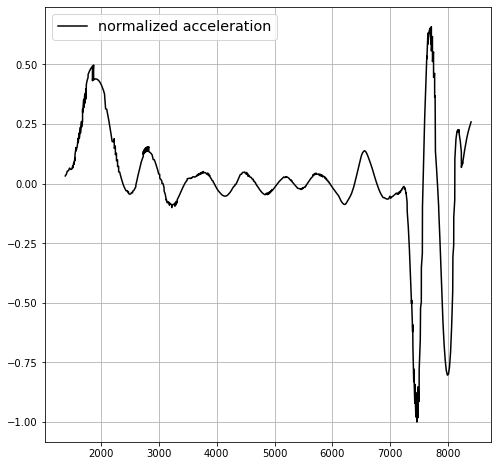

In [32]:
_df = df3

x = _df['twist.twist.linear.x']
y = _df['twist.twist.linear.y']
z = _df['twist.twist.linear.z']
v = (x ** 2 + y ** 2 + z ** 2) ** 0.5
t = _df.Time
temp_df = pd.DataFrame({'t': t, 'v': v}).diff().drop_duplicates(['v'])
_a = temp_df.v / temp_df.t
a = []
_a = _a[abs(_a) > 10e-6].rolling(window=1).mean()
_a = _a.dropna().rolling(window=12).mean()
a = _a / _a.abs().max()
plt.figure(figsize=(8, 8))
plt.grid(True, 'both')


import json
with open('agile_acceleration.json', 'w') as fp:
    json.dump(a.dropna().tolist(), fp)

plt.plot(a, label="normalized acceleration", color='black')
plt.legend(fontsize="x-large")
plt.show()

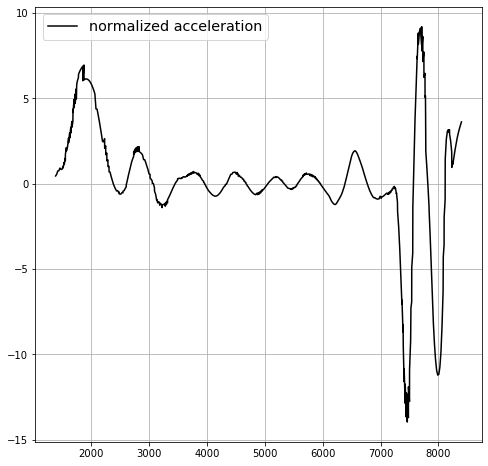

In [12]:
plt.figure(figsize=(8, 8))
plt.grid(True, 'both')
plt.plot(_a, label="normalized acceleration", color='black')
plt.legend(fontsize="x-large")
plt.show()

In [13]:
v[abs(v) > 10e-6].max()

7.631479699469184

In [14]:
v[abs(v) > 10e-6].mean()

5.977597856394126

In [15]:
df = pd.DataFrame({'v': v[abs(v) > 10e-6], 'a': _a})
df.describe()

,v,a
count,7128.000000,749.000000
mean,5.977598,0.200120
std,2.087069,3.326334
min,0.000054,-13.962539
25%,5.777417,-0.557006
50%,7.029058,0.192514
75%,7.212638,1.142224
max,7.631480,9.194480


In [16]:
import numpy as np

In [17]:
s='''       0.000        0.000      297.523      787.344
       1.000       13.000      297.523      787.344
       2.002       11.000      297.523      787.344
       3.003       14.000      297.523      787.344
       4.004       29.000      296.766      786.469
       5.006       28.000      297.488      787.312
       6.007       27.000      297.488      787.312
       7.008       32.000      296.820      786.469
       8.010       36.000      296.727      786.469
       9.011       33.900      297.551      787.344
      10.012       28.000      297.551      787.344
      11.014       30.000      296.711      786.469
      12.015       26.000      297.512      787.324
      13.016       24.000      297.512      787.324
      14.018       23.000      297.512      787.324
      15.019       30.000      296.641      786.469
      16.020       31.000      296.703      786.469
      17.022       31.000      296.750      786.469
      18.023       30.000      296.766      786.469
      19.024       21.000      297.531      787.324
      20.026       26.000      297.531      787.324
      21.027       19.000      297.531      787.324
      22.028       22.000      297.531      787.324
      23.030       34.000      296.602      786.680
      24.031       32.000      296.609      786.469
      25.032       28.000      297.367      787.336
      26.034       25.000      297.367      787.336
      27.035       28.000      297.367      787.336
      28.036       28.000      297.367      787.336
      29.038       27.000      297.367      787.336
      30.039       32.000      297.465      787.379
      31.040       23.000      297.465      787.379
      32.042       25.000      297.465      787.379
      33.043       34.900      296.879      786.539
      34.044       32.000      296.820      786.539
      35.045       31.000      297.352      787.387'''

In [18]:
a = np.array([float(x.split()[1]) for x in s.split('\n')])

In [19]:
a.max()

36.0

In [20]:
a.mean()

26.244444444444444

In [21]:
a.min()

0.0